In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
np.set_printoptions(linewidth=150)

In [30]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [31]:
validation_images, validation_labels = train_images[50000:], train_labels[50000:]
train_images, train_labels = train_images[:50000], train_labels[:50000]

In [32]:
train_images = train_images.reshape((50000, 28, 28, 1))
validation_images = validation_images.reshape((10000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, validation_images, test_images = train_images / 255.0, \
                                                validation_images / 255.0, \
                                                test_images / 255.0

In [33]:
print(train_images.shape)
print(validation_images.shape)
print(test_images.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

TypeError: Invalid dimensions for image data

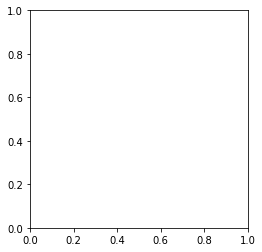

In [34]:
print(train_images[0])
plt.gray()
plt.imshow(train_images[0])

In [41]:
# BATCH_SIZE = 100

# train_data = train_data.batch(BATCH_SIZE)
# validation_data = validation_data.batch(num_validation_samples)
# validation_inputs, validation_targets = next(iter(validation_data))

# test_data = test_data.batch(num_test_samples)

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(tf.keras.layers.Dropout(0.1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(tf.keras.layers.Dropout(0.1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [36]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(layers.Dense(10, activation='softmax'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                7

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
NUM_EPOCHS = 5
EARLY_STOPPING = tf.keras.callbacks.EarlyStopping(patience=1)

# model.fit(train_images, train_labels, epochs=5)
model.fit(train_images, train_labels, batch_size=100, epochs=NUM_EPOCHS, validation_data=(validation_images, validation_labels), callbacks=[EARLY_STOPPING])

W0823 07:07:28.066337 4507637184 deprecation.py:323] From /anaconda3/envs/deep_learning/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 19s 383us/sample - loss: 0.2560 - accuracy: 0.9196 - val_loss: 0.0744 - val_accuracy: 0.9786
Epoch 2/5
50000/50000 [==============================] - 20s 390us/sample - loss: 0.0634 - accuracy: 0.9807 - val_loss: 0.0499 - val_accuracy: 0.9857
Epoch 3/5
50000/50000 [==============================] - 20s 402us/sample - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0371 - val_accuracy: 0.9883
Epoch 4/5
50000/50000 [==============================] - 20s 393us/sample - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0344 - val_accuracy: 0.9894
Epoch 5/5
50000/50000 [==============================] - 20s 390us/sample - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0410 - val_accuracy: 0.9881


In [40]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 101us/sample - loss: 0.0336 - accuracy: 0.9885
